<a href="https://colab.research.google.com/github/Prethumnan/Social-network-ads/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import roc_auc_score

**Importing the dataset**

In [3]:
data=pd.read_csv("Social_Network_Ads.csv")

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data["Gender"]=data["Gender"].replace({"Male":1,"Female":0})

In [7]:
data.drop(["User ID","Gender"],axis=1,inplace=True)

In [8]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [9]:

x=data.drop("Purchased",axis=1)
y=data["Purchased"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Feature Scaling**

In [10]:
scaler=MinMaxScaler()
scaler.fit(x_train)
for i in ["Age","EstimatedSalary"]:
  x_train[[i]]=scaler.fit_transform(x_train[[i]])
scaler.fit(x_test)
for i in ["Age","EstimatedSalary"]:
  x_test[[i]]=scaler.fit_transform(x_test[[i]])


**Fitting Decision Tree Classification to the Training set**

In [11]:
depth=[]
score=[]
for i in range(2,10):
  model=DecisionTreeClassifier(max_depth=i)
  model.fit(x_train,y_train)
  depth.append(i)
  score.append(np.mean(cross_val_score(model,x_train,y_train)))
  print("depth : ",i,"Training score :",model.score(x_train,y_train),"cross_val_score : ",np.mean(cross_val_score(model,x_train,y_train)))

depth :  2 Training score : 0.928125 cross_val_score :  0.921875
depth :  3 Training score : 0.928125 cross_val_score :  0.91875
depth :  4 Training score : 0.9375 cross_val_score :  0.88125
depth :  5 Training score : 0.94375 cross_val_score :  0.896875
depth :  6 Training score : 0.95625 cross_val_score :  0.896875
depth :  7 Training score : 0.971875 cross_val_score :  0.878125
depth :  8 Training score : 0.975 cross_val_score :  0.88125
depth :  9 Training score : 0.984375 cross_val_score :  0.884375


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


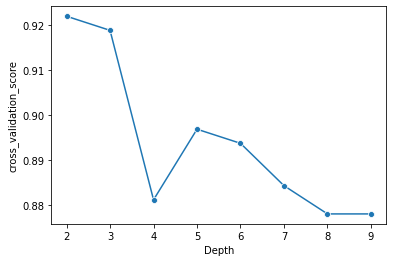

In [12]:
plt.xlabel("Depth")
plt.ylabel("cross_validation_score")
sns.lineplot(depth,score,marker="o")

In [13]:
model=DecisionTreeClassifier(max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [14]:
model.score(x_test,y_test)

0.825

**Predicting the Test set results**

In [15]:
y_pred=model.predict(x_test)
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
145,0,1
296,1,0
207,0,1
285,1,1
16,1,1
...,...,...
121,0,0
280,1,1
1,0,0
241,0,0


In [16]:
roc_auc_score(y_test,y_pred)

0.8666666666666666

**Making the Confusion Matrix**

In [17]:
confusion_matrix(y_test,y_pred)

array([[47, 13],
       [ 1, 19]])

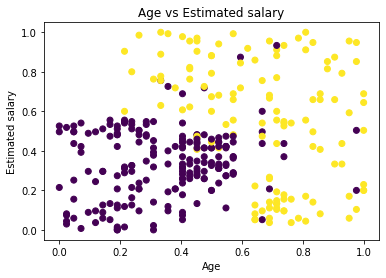

In [18]:
#visualization of training data
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_train["Age"],x_train["EstimatedSalary"],c=y_train)

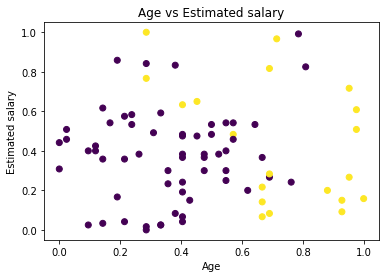

In [19]:
#visualization of testing data(Actual)
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_test["Age"],x_test["EstimatedSalary"],c=y_test)

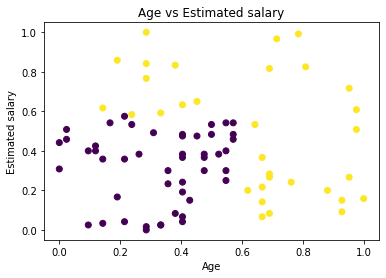

In [20]:
#visualization of testing data(predicted)
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_test["Age"],x_test["EstimatedSalary"],c=y_pred)